In [4]:
import pandas as pd 
import numpy as np

In [47]:
df_bi = pd.read_csv("./data/train_bicycle.csv")
df_bi.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# df_ve = pd.read_csv("./data/train_vegetable.csv")
# df_ve.head()

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),...,청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.0,80272.0,360.0,122787.5,1281.0,3.0,11000.0,...,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.0,1699653.7,382.0,2315079.0,1235.0,699.0,4464.0,...,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.0,1423482.3,422.0,2092960.1,1213.0,1112.6,4342.0,...,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0


# 섹션 04 
## 4-1 원핫인코딩

In [11]:
df_bi.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

카테고리형 feature  알아보기 

In [17]:
print("s : " , df_bi['season'].unique())
print("h : ", df_bi['holiday'].unique())
print("w : ", df_bi['workingday'].unique())
print("w : ", df_bi['weather'].unique())
# print("c : ", df_bi['casual'].unique())
# print("r : ", df_bi['registered'].unique())


s :  [1 2 3 4]
h :  [0 1]
w :  [0 1]
w :  [1 2 3 4]


season, 

In [48]:
# from sklearn.preprocessing import OneHotEncoder 
print("전 : ",df_bi.shape)
df_bi = pd.get_dummies(df_bi, columns= ['season', 'weather'])
print("후 : ", df_bi.shape)
df_bi.head()


전 :  (10886, 12)
후 :  (10886, 18)


,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


## 4-2 특성 스케일링

> 정규화 표준화 차이는 무엇일까? 
[참고1](https://bskyvision.com/849) [참고2](https://mkjjo.github.io/python/2019/01/10/scaler.html)

- 정규화 : 특성 값의 범위를 `0~1` 로 옮김 
    - **이상치 존재에 매우 민감하다**

- 표준화 : 뮤 = 특성의 평균값, 시그마 = 표준편차 => `정규분포의 표준화` 
    - 표준화는 어떤 특성의 값을 정규분포(종모양의 분포)를 따른다고 가정하는 것 
    - `평균은 0`으로, `표준편차는 1`을 갖도록 변화하는 것 
    - 표준화를 해주면 정규화처럼 특성값의 범위가 `0~1 범위로 바뀌지 X` 
    - **이상치가 있는 경우 균형잡힌 척도를 보장할 수 없다**


> 그럼 둘 중에 어떤 것이 더 나은가? 
- 둘 다 해보고 성능을 비교해서 결정하는 것이 낫다. 
- 그리고 둘의 차이는 엄청 크다. 따라서 곡 비교해줘야 한다. 

> 추가 scaler 
- MaxAbsScaler : 최대절대값과 0이 각각 1과 0이 되도록 스케일링 
     - **큰 이상치 존재에 민감하다**
- RobustScaler : 중앙값과 `IQR`사용. 아웃라이어의 영향을 최소화 
+ `IQR` : Q3 - Q1 (상위 75% - 하위 25%) = box plot의 기본이 되는 수치  (Q1 - 1.5 X IQR ~ Q3 - 1.5 X IQR)


> 이상치 제거 필수 
- 결론적으로 모든 스케일러 처리 전에는 아웃라이어 제거가 선행되어야 한다. 



In [ ]:
# 이상치 확인 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

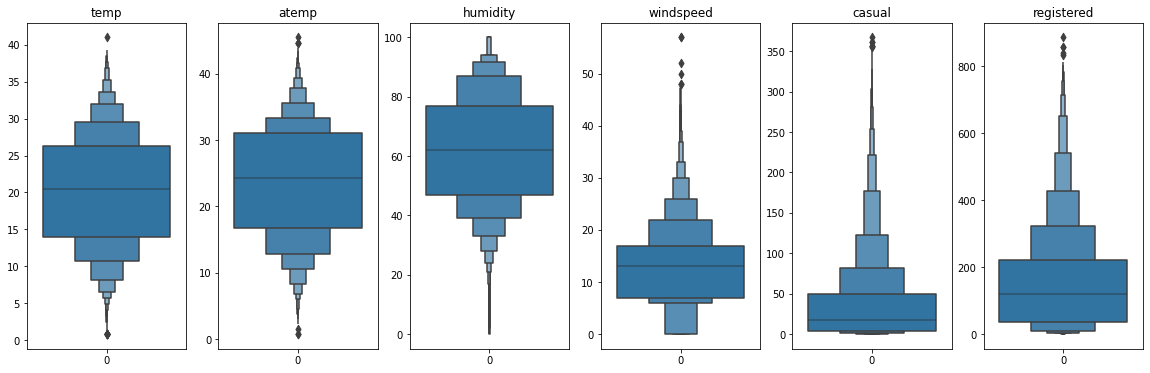

In [49]:
li_col = ['temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered']

fig, ax = plt.subplots(1,6, figsize = (20,6))
count = 0
for col in li_col : 
    sns.boxenplot(data = df_bi[col], ax = ax[count])
    ax[count].set_title(col)
    count +=1 
plt.show()

각 feature 별로 이상치가 humidity 빼고 다 있는 것을 확인할 수 있음 
- [이상치제거](https://hwi-doc.tistory.com/entry/IQR-%EB%B0%A9%EC%8B%9D%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%9D%B4%EC%83%81%EC%B9%98-%EB%8D%B0%EC%9D%B4%ED%84%B0Outlier-%EC%A0%9C%EA%B1%B0) 

In [50]:
# 이상치 제거 
def get_outlier(df, col) : 
    Q25= np.percentile(df[col].values, 25)
    Q75= np.percentile(df[col].values, 75)
    
    IQR = Q75-Q25 
    
    lowest = Q25 - 1.5*IQR
    highest = Q75 + 1.5*IQR 
    
    outlier_idx = df[col][(df[col] < lowest) | (df[col] > highest)].index 
    
    return outlier_idx 

for col in li_col : 
    outlier_idx = get_outlier(df_bi, col)
    df_bi.drop(outlier_idx, axis = 0, inplace= True)
    


In [51]:
df_bi.shape

(9383, 18)

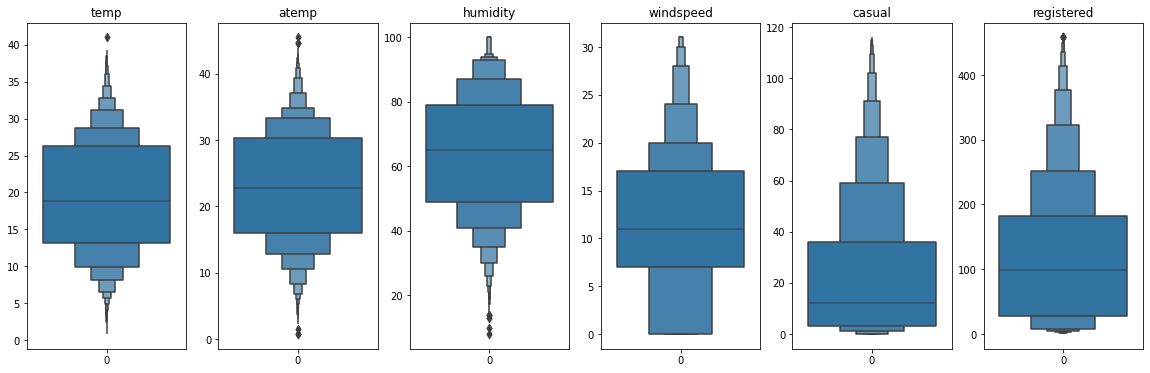

In [52]:
# 제거 확인 
fig, ax = plt.subplots(1,6, figsize = (20,6))
count = 0
for col in li_col : 
    sns.boxenplot(data = df_bi[col], ax = ax[count])
    ax[count].set_title(col)
    count +=1 
plt.show()

In [53]:
# 정규화 
# (x-min(x)) / (max(x) - min(x))


for col in li_col : 
    df_bi[col] = (df_bi[col] - min(df_bi[col])) / (max(df_bi[col]) - min(df_bi[col]))

df_bi.head()


# from sklearn.preprocessing import MinMaxScaler 
# scaler = MinMaxScaler()
# df_bi = scaler.fit_transform(df_bi)

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,0.224490,0.305068,0.793478,0.0,0.025862,0.028384,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,0.204082,0.288064,0.782609,0.0,0.068966,0.069869,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,0.204082,0.288064,0.782609,0.0,0.043103,0.058952,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,0.224490,0.305068,0.728261,0.0,0.025862,0.021834,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,0.224490,0.305068,0.728261,0.0,0.000000,0.002183,1,1,0,0,0,1,0,0,0


In [54]:
df_bi.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
count,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000,9383.000000
mean,0.026751,0.709581,0.465373,0.495639,0.606894,0.390589,0.203378,0.264467,144.717787,0.260897,0.240435,0.238623,0.260045,0.647234,0.270489,0.082170,0.000107
std,0.161362,0.453980,0.190963,0.186875,0.203075,0.240114,0.230723,0.233188,124.423204,0.439147,0.427370,0.426265,0.438682,0.477856,0.444236,0.274638,0.010324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.306122,0.338964,0.445652,0.225848,0.025862,0.061135,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.448980,0.491442,0.619565,0.354874,0.103448,0.216157,119.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.632653,0.661036,0.771739,0.548303,0.310345,0.399563,226.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,563.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# 표준화 
# from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler()
# df_bi = scaler.fit_transform(df_bi)

In [ ]:
# MaxAbsScaler 
# from sklearn.preprocessing import MaxAbsScaler 
# scaler = MaxAbsScaler()
# df_bi = scaler.fit_transform(df_bi)

> 파이프라인이란? 